In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function that receives original dataframe and cleans the data
# Actions performed: 
# - order by timestamp
# - change market_sentiment to numerical
# - change market_instability to numerical
# - replace all nan in other numerical with the previous value (or drop them otherwise)
# - change anonymous to the numerical part of the feature
# - set index to id
def clean_data(df_ini, sample_size, train_data=True):
    
    df_clean = df_ini[:sample_size].copy()
    
    # order by timestamp
    df_clean = df_clean.sort_values(by=['unix_timestamp'])

    
    # market_sentiment cleaning: replace tp numerical
    replace_dic_sentiment = {"Very Positive": 2, "Positive": 1, "Neutral": 0, "Very Negative": -1, "Negative": -2}
    df_clean["market_sentiment"] = df_clean["market_sentiment"].replace(replace_dic_sentiment)    
#     df_clean["market_sentiment"] = df_clean["market_sentiment"].replace({np.nan: 0})
    
    # market_instability cleaning
    replace_dic_instability = {'None' : 0, 'Low' : 1, 'Medium' : 2, 'High' : 3}
    df_clean["market_instability"] = df_clean["market_instability"].replace(replace_dic_instability)    

        
    # fill all NaNs with nearest past value
    df_clean = df_clean.ffill() 
#     print(np.sum(df_clean.isna())) #check that there are no more NaNs   
    
    # if there any na left, lets replace with the m
    df_clean = df_clean.ffill() 
        
    # Anonymous (there are no NaN's)
    df_clean['anonymous'] = df_clean['anonymous'].str.split('_').str[1].astype(int)
    
    # lastly set index to id
    df_clean = df_clean.set_index('id')

    # replace all nan in other numerical with the median value
    df_col = df_clean.columns
    fill_median_dic = {}
    for col in df_col:
        col_str = str(col)
        fill_median_dic[col_str] = df_clean[col_str].median()
    print(fill_median_dic)
    df_clean = df_clean.fillna(fill_median_dic) 
    
    
    #remove price_buy and price_sell
    df_clean = df_clean.drop(["price_buy", "price_sell"], axis=1)
    
    return df_clean

In [3]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,id,unix_timestamp,market_sentiment,market_instability,market_volatility,trades_number,trades_size,price_buy,price_sell,price_global,orders_buy_qty,orders_sell_qty,orders_buy_qty_top20,orders_sell_qty_top20,anonymous,success
0,X3HK4QZ3780BO068DDII1F38,1.627818e+12,NaN,None,0.00034,77.0,NaN,988.48333,988.59048,988.94298,40.74,8.44,305.05,21.88,category_76,1
1,MIYIKL1LO0C2YJWEYVJD2QSR,1.627818e+12,Very Positive,None,NaN,78.0,206.77,988.48571,988.48810,988.88298,5.50,14.95,93.53,179.09,category_85,1
2,YU8WZGAT0E8AHU44N52Y4O69,1.627818e+12,Very Positive,None,NaN,NaN,NaN,988.40000,988.40238,988.84869,4.20,7.39,69.51,277.49,category_22,0
3,T88FOCZN28J115T6AM5X9QYZ,1.627818e+12,Very Positive,None,0.00038,96.0,NaN,988.65476,988.65714,989.03988,49.18,41.96,251.58,58.59,category_133,0
4,N8WDQ2NL2FYAA7YOC37Q1CTO,1.627818e+12,Very Positive,Low,0.00045,137.0,338.77,989.04524,989.04762,989.57036,51.53,0.46,279.76,11.47,category_23,0


In [4]:
# sample_size = 1000
sample_size = train_df.shape[0]
clean_train_df = clean_data(train_df, sample_size)
clean_train_df.head(20)

{'unix_timestamp': 1627992763144.9822, 'market_sentiment': 0.0, 'market_instability': 0.0, 'market_volatility': 0.00011, 'trades_number': 22.0, 'trades_size': 67.58, 'price_buy': 929.76905, 'price_sell': 929.81429, 'price_global': 929.77589, 'orders_buy_qty': 5.54, 'orders_sell_qty': 5.46, 'orders_buy_qty_top20': 172.58, 'orders_sell_qty_top20': 162.08, 'anonymous': 70.0, 'success': 0.0}


,unix_timestamp,market_sentiment,market_instability,market_volatility,trades_number,trades_size,price_global,orders_buy_qty,orders_sell_qty,orders_buy_qty_top20,orders_sell_qty_top20,anonymous,success
id,,,,,,,,,,,,,
X3HK4QZ3780BO068DDII1F38,1.627818e+12,0.0,0.0,0.00034,77.0,67.58,988.94298,40.74,8.44,305.05,21.88,76,1
MIYIKL1LO0C2YJWEYVJD2QSR,1.627818e+12,2.0,0.0,0.00034,78.0,206.77,988.88298,5.50,14.95,93.53,179.09,85,1
YU8WZGAT0E8AHU44N52Y4O69,1.627818e+12,2.0,0.0,0.00034,78.0,206.77,988.84869,4.20,7.39,69.51,277.49,22,0
T88FOCZN28J115T6AM5X9QYZ,1.627818e+12,2.0,0.0,0.00038,96.0,206.77,989.03988,49.18,41.96,251.58,58.59,133,0
N8WDQ2NL2FYAA7YOC37Q1CTO,1.627818e+12,2.0,1.0,0.00045,137.0,338.77,989.57036,51.53,0.46,279.76,11.47,23,0
J7I57WWZYCR8LO7AZGKF7OOO,1.627818e+12,2.0,1.0,0.00049,158.0,350.32,989.75155,48.43,51.03,291.10,138.43,14,1
JWV4SOKLFPI1ZSP3FA4L39L4,1.627818e+12,2.0,1.0,0.00050,164.0,436.34,989.42131,5.12,67.79,37.76,314.58,9,0
H8QZB4MIEZMGGD3JQARQHQFK,1.627818e+12,2.0,1.0,0.00048,164.0,436.34,989.54333,5.46,10.84,153.85,163.21,18,0
2H4UFA1AG81JU15UCRFTXPWD,1.627818e+12,2.0,1.0,0.00028,164.0,436.34,989.57036,0.34,0.04,150.07,152.04,138,0


/tmp/ipykernel_64270/333301192.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(np.bool)


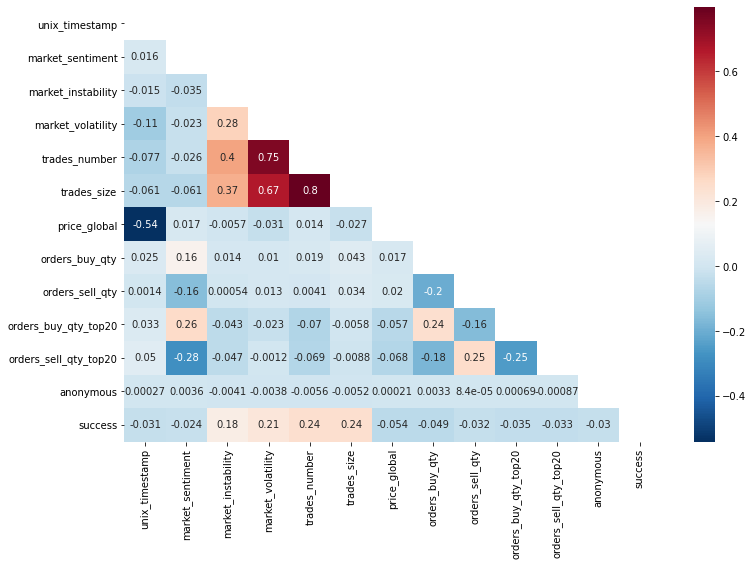

In [5]:
cor_mat = clean_train_df.corr(method="spearman")
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(np.bool)
cor_mat_lower = cor_mat.mask(lower_triangle_mask)

plt.figure(figsize = (12,8)) # <-- just sets the figure size 
sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap

In [6]:
# sample_size = 1000
test_df = pd.read_csv('data/test.csv')
sample_size = test_df.shape[0]
clean_test_df = clean_data(test_df, sample_size, False)
#display(clean_test_df.head(20))
#display(clean_test_df.shape)


{'unix_timestamp': 1628212672984.4878, 'market_sentiment': 0.0, 'market_instability': 0.0, 'market_volatility': 0.00014, 'trades_number': 33.0, 'trades_size': 101.6, 'price_buy': 967.72143, 'price_sell': 967.76429, 'price_global': 967.58119, 'orders_buy_qty': 6.72, 'orders_sell_qty': 5.8, 'orders_buy_qty_top20': 158.93, 'orders_sell_qty_top20': 160.44, 'anonymous': 71.0}


In [7]:
import pyarrow as pa

clean_train_df.to_parquet('cleaned_train_set.parquet')
clean_test_df.to_parquet('cleaned_test_set.parquet')
